In [1]:
from ase.io import read
from rascal.neighbourlist.structure_manager import mask_center_atoms_by_species
from rascal.representations import SphericalInvariants as SOAP
from feature_utils.parallel import get_features_in_parallel
import json 
from joblib import load
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from copy import deepcopy
import time 

In [78]:
trajframes = read("../CSD-500.xyz",format="extxyz",index=":")  
#print(len(trajframes))
for frame in trajframes: frame.wrap(eps=1e-12)
model = load("../data/RR_this_work_models/{}_RR.joblib".format(6))
for frame in trajframes: mask_center_atoms_by_species(frame,[6]) 
f = open("../data//RR_this_work_models/hypers/{}_hypers.json".format(6))
hypers = json.load(f)
X = get_features_in_parallel(trajframes,SOAP,hypers)
#yKRR = np.concatenate([structure.arrays["CS"][structure.arrays["center_atoms_mask"]] for structure in trajframes])
Ypred_wo = model.predict(X)
yKRR = np.concatenate([structure.arrays["CS"][structure.arrays["center_atoms_mask"]] for structure in trajframes])
shiftML_v1 = yKRR[:,1]

In [79]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

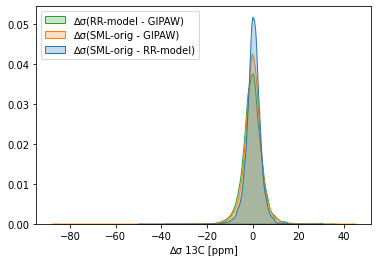

In [94]:
delta_shiftML_RR = pd.DataFrame(np.concatenate([(shiftML_v1-Ypred_wo).reshape(-1,1),(shiftML_v1-yKRR[:,0]).reshape(-1,1),(Ypred_wo-yKRR[:,0]).reshape(-1,1)],axis=1), columns=["∆(ShiftMLorig - RR model)","∆(ShiftMLorig - GIPAW)","∆(RR model - GIPAW)"])




fig, ax = plt.subplots()
#sns.kdeplot(data=[delta_RR_GIPAW],fill=True,color="orange", ax=ax,common_norm=False,log_scale=(False,False))
sns.kdeplot(data=delta_shiftML_RR,fill=True, ax=ax),#common_norm=False,log_scale=(False,False))
#sns.kdeplot(data=masses_qm9,fill=True,color="blue", ax=ax,common_norm=False)
ax.set_xlabel("∆σ 13C [ppm]")
ax.set_ylabel("")
#ax.set_ylim(0.001,0.01)
#ax.set_yticks([])
plt.legend(["∆σ(RR-model - GIPAW)","∆σ(SML-orig - GIPAW)","∆σ(SML-orig - RR-model)"],loc='upper left')
plt.savefig("shiftML_diff_C.png",dpi=300)

In [85]:
delta_shiftML_RR.xs

<bound method NDFrame.xs of        ∆(ShiftMLorig - RR model)  ∆(ShiftMLorig - GIPAW)  ∆(RR model - GIPAW)
0                      -3.125042                   -1.49             1.635042
1                      -3.124043                   -1.49             1.634043
2                      -2.673629                   -3.16            -0.486371
3                      -2.673225                   -3.16            -0.486775
4                       4.019504                    1.26            -2.759504
...                          ...                     ...                  ...
26602                   0.702173                    2.03             1.327827
26603                  -4.651080                    0.21             4.861080
26604                  -4.651984                    0.21             4.861984
26605                  -4.635189                    0.20             4.835189
26606                  -4.634415                    0.20             4.834415

[26607 rows x 3 columns]>

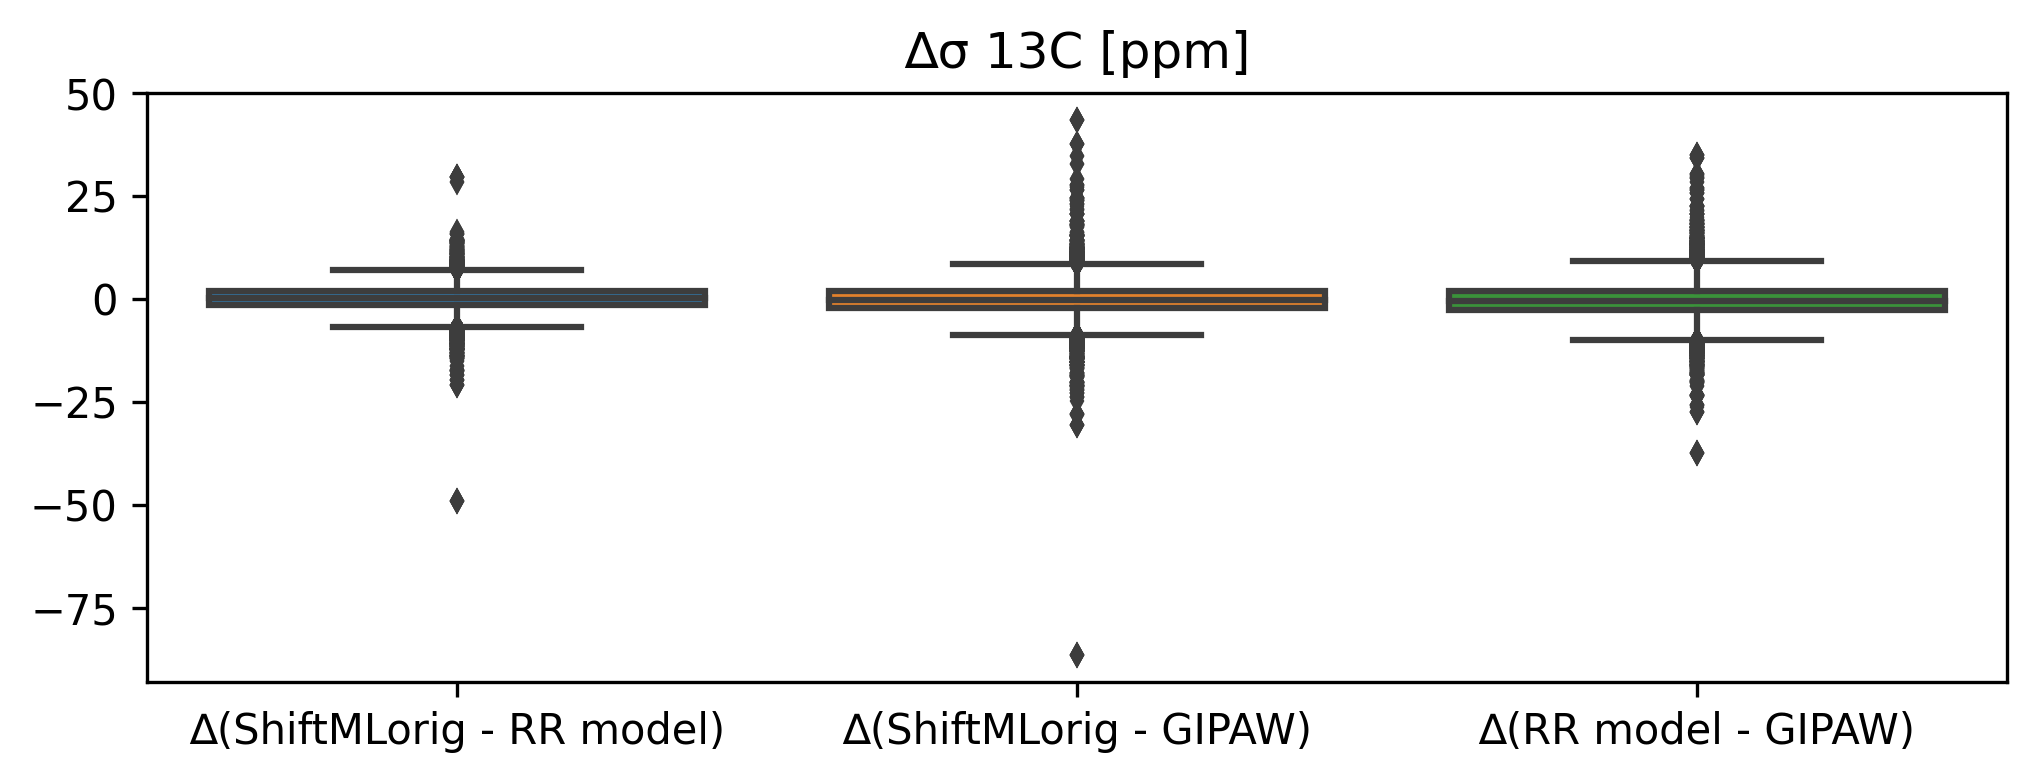

In [105]:
plt.figure(figsize=(8.,2.6),dpi=300)
ax = sns.boxplot(data=delta_shiftML_RR,fliersize=3)
ax.set_title("∆σ 13C [ppm]")
plt.savefig("boxlot_C_errors.png",dpi=300,bbox_inches='tight')

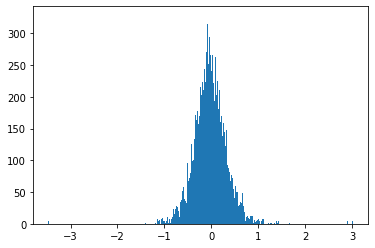

In [17]:
_ = plt.hist(shiftML_v1-Ypred_wo, bins=1000)

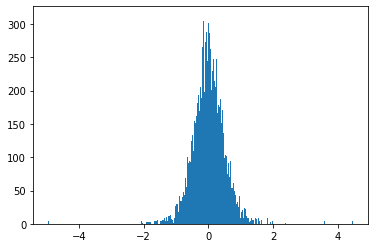

In [19]:
_ = plt.hist(Ypred_wo-yKRR[:,0], bins=1000)

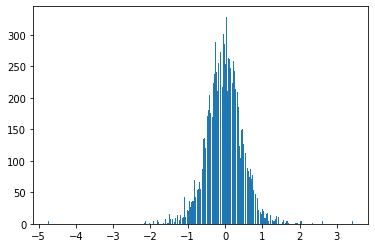

In [18]:
_ = plt.hist(shiftML_v1-yKRR[:,0], bins=1000)

In [20]:
np.std(shiftML_v1-Ypred_wo)

0.3416528746935716

In [21]:
np.std(Ypred_wo-yKRR[:,0])

0.49312067766129675

In [22]:
np.std(shiftML_v1-yKRR[:,0])

0.4868412835575898

In [25]:
mean_squared_error(Ypred_wo,yKRR[:,0],squared=False)

0.4931472535110136

In [26]:
mean_squared_error(Ypred_wo,yKRR[:,1],squared=False)

0.3420782750964518

In [28]:
mean_squared_error(shiftML_v1,yKRR[:,0],squared=False)

0.48698755454359033